In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Data = pd.read_csv('Advertising.csv')
Data.head()

,Index,TV,Radio,Newspaper,Sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9


In [5]:
Data.tail()

,Index,TV,Radio,Newspaper,Sales
195,195,38.2,3.7,13.8,7.6
196,196,94.2,4.9,8.1,9.7
197,197,177.0,9.3,6.4,12.8
198,198,283.6,42.0,66.2,25.5
199,199,232.1,8.6,8.7,13.4


In [6]:
Data.head(2)

,Index,TV,Radio,Newspaper,Sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4


In [7]:
Data.describe()

,Index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,0.000000,0.700000,0.000000,0.300000,1.600000
25%,49.750000,74.375000,9.975000,12.750000,10.375000
50%,99.500000,149.750000,22.900000,25.750000,12.900000
75%,149.250000,218.825000,36.525000,45.100000,17.400000
max,199.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
Data.isna().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
Data.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
import pandas_profiling

In [12]:
pandas_profiling.ProfileReport(Data)

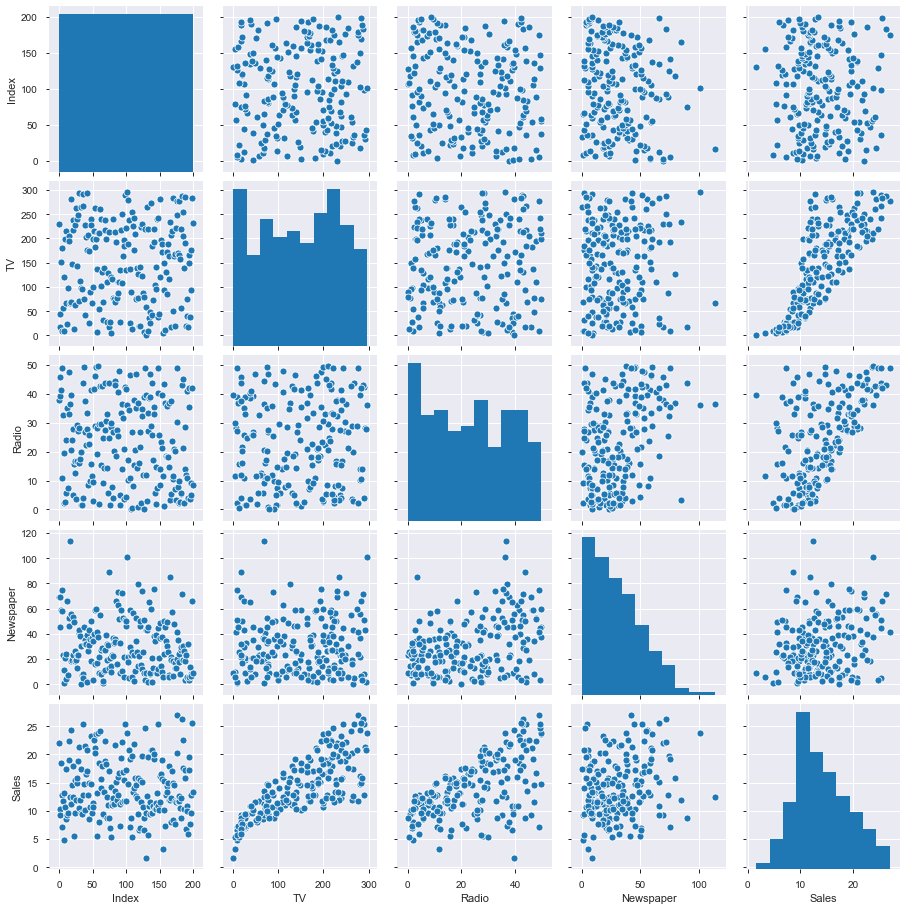

In [13]:
sns.pairplot(Data)

In [14]:
Data.columns

Index(['Index', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [15]:
Features = Data[['TV', 'Radio', 'Newspaper']]
Features.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [16]:
Target= Data['Sales']
Target.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test, Y_train, Y_test = train_test_split(Features, Target)

In [19]:
X_train.shape

(150, 3)

In [20]:
X_test.shape

(50, 3)

In [21]:
Y_train.shape

(150,)

In [22]:
Y_test.shape

(50,)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
Model= LinearRegression()

In [25]:
Model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
Model.fit(X_test, Y_test)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
Train_Score= Model.score(X_train, Y_train)
Train_Score

0.8850868118735157

In [28]:
Test_Score= Model.score(X_test,Y_test)
Test_Score

0.9288413680492738

In [29]:
# Test_Score < Train_Score  ==> Underfitting
# Train > Train_Score  ==> Overfitting

In [30]:
## Evaluate 

In [31]:
## Cross Validation

In [32]:
Model.coef_

array([0.04431452, 0.19429359, 0.0031684 ])

In [33]:
Model.intercept_

2.919312552379285

# To predict future Data

In [34]:
New_Prediction= Model.predict(X_test)
New_Prediction

array([14.70928584, 12.25649743, 17.84263954,  9.97821547, 11.56323638,
       20.85243587, 17.59772155,  3.7116024 ,  9.15826491,  7.05208061,
       11.91468488,  9.9219933 , 12.66994179, 14.90320352,  4.57824741,
       23.26024242, 16.32587212, 12.3745836 , 11.94740362, 18.14872949,
       22.21232718, 11.80191837, 15.00513804, 10.06773702, 20.82853163,
       18.62055982,  9.62904795, 13.39617997, 14.53440301, 16.62182605,
       18.30567043,  7.7470412 , 11.00250068, 15.97250675, 14.86599386,
       21.67216634,  4.51441751,  8.58299396,  9.88720193, 24.82339995,
        7.61317655,  9.10181295, 17.23248944, 21.14237051, 15.13627693,
       15.37121675, 19.31137499, 12.26209801, 12.67357968, 17.19716037])

In [35]:
df= pd.DataFrame({'Actual Data': Y_test, 'New_Prediction': New_Prediction, 'Error': Y_test-New_Prediction})
df.head()

,Actual Data,New_Prediction,Error
83,13.6,14.709286,-1.109286
179,12.6,12.256497,0.343503
3,18.5,17.842640,0.657360
149,10.1,9.978215,0.121785
80,11.8,11.563236,0.236764


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

In [37]:
mean_squared_error(Y_test, New_Prediction)

1.9073669959707984

In [38]:
mean_absolute_error(Y_test,New_Prediction)

1.0945959814207273

### Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
cv= cross_val_score(Model, X_train, Y_train, cv=30)
cv

array([0.88730164, 0.82638334, 0.55189624, 0.95247529, 0.91023781,
       0.93800406, 0.89301142, 0.90231259, 0.94385124, 0.92816902,
       0.49417439, 0.6437184 , 0.75593962, 0.95854647, 0.38286276,
       0.13013343, 0.89266906, 0.92242775, 0.94276316, 0.48942052,
       0.9637741 , 0.57482341, 0.97899939, 0.70131569, 0.14601825,
       0.93363795, 0.95556553, 0.914513  , 0.23500724, 0.95228158])

In [41]:
np.mean(cv)

0.756741145299152

In [42]:
np.median(cv)

0.8976620082830988

In [43]:
np.min(cv)

0.13013342797196414

In [44]:
np.max(cv)

0.9789993868767426

In [45]:
np.std(cv)

0.25672096835328384

In [46]:
### Regularization using LASSO , RIDGE and ELASTIC NET

In [47]:
from sklearn.linear_model import Ridge,Lasso

In [48]:
rr= Ridge(alpha=0.01)
rr.fit(X_train, Y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
rr_train_score= rr.score(X_train, Y_train)
rr_train_score

0.8874716427044751

In [50]:
rr_test_score=rr.score(X_test,Y_test)
rr_test_score

0.926023542469926

In [51]:
rr.coef_

array([ 0.04634369,  0.1864954 , -0.00270901])

In [52]:
rr.intercept_

2.9380534201515704

## LASSO

In [53]:
la= Lasso()

In [54]:
la.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
la_train_score= la.score(X_train, Y_train)
la_train_score

0.8871922121424191

In [56]:
la_test_score= la.score(X_test, Y_test)
la_test_score

0.9255751897169363

In [57]:
la.coef_

array([ 0.04622019,  0.18053192, -0.        ])

In [58]:
la.intercept_

3.011138489713966

### ELASTIC NET = Ridge + Lasso

In [59]:
from sklearn.linear_model import ElasticNet

In [64]:
EN = ElasticNet()

In [65]:
EN.fit(X_train, Y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
EN_Train_Score= EN.score(X_train, Y_train)
EN_Train_Score

0.8873514081728596

In [68]:
EN_Test_Score=EN.score(X_test, Y_test)
EN_Test_Score

0.92588324453256

In [78]:
EN.coef_

array([ 0.04627486,  0.18274636, -0.00068083])

In [79]:
EN.intercept_

2.972740480196146

### CROSS VALIDATION

In [70]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [71]:
La_CV= LassoCV()
RR_CV = RidgeCV()
EN_CV = ElasticNetCV()

In [74]:
La_CV.fit(X_train, Y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [75]:
RR_CV.fit(X_train, Y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [76]:
EN_CV.fit(X_train, Y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [77]:
Df= pd.DataFrame({'La_CV_Pred': La_CV.predict(X_test), 'RR_CV_Pred': RR_CV.predict(X_test), 'EN_CV_Pred': EN_CV.predict(X_test)})
Df.head()

,La_CV_Pred,RR_CV_Pred,EN_CV_Pred
0,14.129777,14.309242,14.110870
1,12.519651,12.430489,12.530708
2,17.399030,17.502169,17.384043
3,9.732271,9.765049,9.728430
4,11.354067,11.397353,11.349971
